# IA 2023 - Sergio Vega García
## Reconocedor de números

### Nivel C

Haremos una comparación de los siguientes modelos: 
- [Regresión logística](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
- [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- [Árbol de decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Bosque aleatorio](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


Para hacer el aprendizaje usaremos el dataset "[digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)" de scikit-learn y la comparación de los modelos se hará con el rendimiento de cada modelo con el conjunto de test que hemos elegido y la matriz de confusión. 

Los digitos con los que vamos a trabajar tienen la siguiente apariencia:

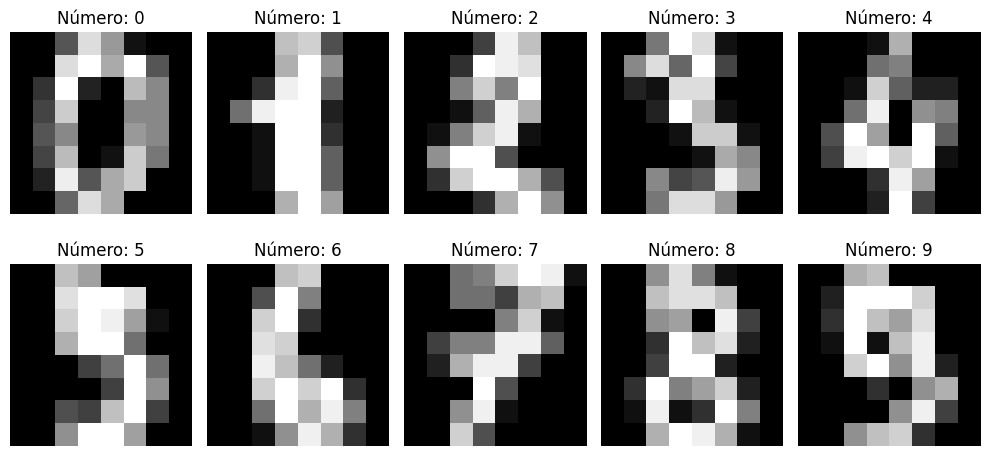

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# loads the dataset
digits = load_digits()

# Show the appearance of the first ten digits of the dataset in two rows of five columns
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    axes[i // 5, i % 5].imshow(digits.images[i], cmap="gray")
    axes[i // 5, i % 5].set_title(f"Número: {digits.target[i]}")
    axes[i // 5, i % 5].axis("off")

plt.tight_layout()
plt.show()

#### Entrenamiento

Para un correcto entrenamiento hemos de separar el dataset en dos subconjuntos, uno de entrenamiento (común para todos) con el cual se entrenará los distintos modelos y otro de test (común para todos) con el que se realizarán los análisis, pruebas, tests, etc.

In [2]:
#  Imports
from sklearn.model_selection import train_test_split

# Separa el dataset en 2, uno de entreno y otro de test
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.33, random_state=42
)

Mostramos la distribución de dígitos en los dos subconjuntos para ver que no se sobrerepresenta o infrarepresenta algun dígito en alguno de los dos subconjuntos.

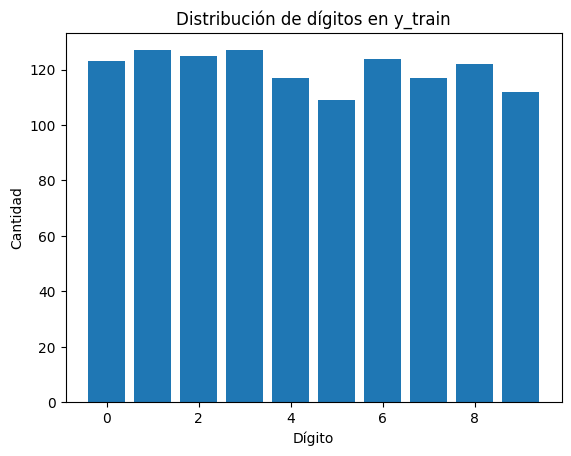

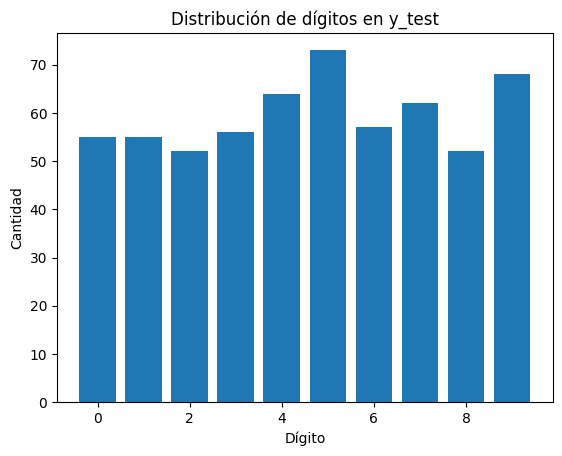

In [3]:
import numpy as np

# Función para mostrar la distribución de dígitos en y
def digitDistribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts)
    plt.xlabel("Dígito")
    plt.ylabel("Cantidad")
    plt.title(title)
    plt.show()


# Muestra la distribución de dígitos en y_train
digitDistribution(y_train, "Distribución de dígitos en y_train")

# Muestra la distribución de dígitos en y_test
digitDistribution(y_test, "Distribución de dígitos en y_test")

Como podemos ver, los dos subconjuntos están medianamente equilibrados.

Procedemos a entrenar los distintos modelos.

In [4]:
# Imports
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# n_jobs=-1 -> parallel ovr computation
logisticRegressionSklearn = LogisticRegression(random_state=42, n_jobs=-1)
# n_jobs=-1 -> parallel ova computation
perceptronSklearn = Perceptron(random_state=42, n_jobs=-1)

decisionTreeSklearn = DecisionTreeClassifier(random_state=42)
randomForestSklearn = RandomForestClassifier(random_state=42)

# models array
modelsSklearn = [
    logisticRegressionSklearn,
    perceptronSklearn,
    decisionTreeSklearn,
    randomForestSklearn,
]

# array containing the models names in spanish
modelsNames = [
    "Regresión logística",
    "Perceptron",
    "Árbol de decisiones",
    "Bosque aleatorio",
]


# Function that trains all models with the dataset X for the true_labels y
def trainModels(models, X, y):
    for model in models:
        model.fit(X, y)


trainModels(modelsSklearn, X_train, y_train)

#### Comparación

##### Comparación de rendimientos

Con las siguientes métricas evaluaremos el rendimiento de los modelos. El valor de las mismas van de 0 a 1, cuanto más proximo al 1 mejor.


$Accuracy = \frac{VP+VN}{VP+FP+FN+VN}$  
La exactitud (Accuracy) indica la proporción entre las predicciones correctas de si un elemento pertenece (o no) a una clase respecto al total de predicciones, en resumen indica el porcentaje de acierto.

$Precision = \frac{VP}{VP+FP}$  
La precisión (Precision) indica la proporción de predicciones acertadas de pertenencia a una clase respecto del total de predicciones de pertenencia.

$Recall = \frac{VP}{VP+FN}$  
La sensibilidad (Recall) indica la capacidad del modelo de correctamente detectar la pertenencia a una clase.

$f_1\text{-score} = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$  
Ésta métrica resume la precisión (Precision) y sensibilidad (Recall) en una sola métrica, ésta es más útil cuando la distribución de las clases es desigual, lo cual no es el caso, por tanto no tiene mayor importancia en este análisis.

In [5]:
# Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Funcion que crea un objeto que contiene los resultados de las metricas para un dataset X con true_labels y
def calcMetrics(models, X, y):
    metrics = {
        "Model": modelsNames,
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "f1-score": [],
    }

    # Calculamos las distintas metricas para cada modelo
    for modelo in models:
        y_pred = modelo.predict(X)
        metrics["Accuracy"].append(accuracy_score(y, y_pred))
        metrics["Precision"].append(precision_score(y, y_pred, average="weighted"))
        metrics["Recall"].append(recall_score(y, y_pred, average="weighted"))
        metrics["f1-score"].append(f1_score(y, y_pred, average="weighted"))

    return metrics


def showMetrics(metrics):
    print(pd.DataFrame(metrics))


metricsModelsSklearn = calcMetrics(modelsSklearn, X_test, y_test)
showMetrics(metricsModelsSklearn)

                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.962963   0.963046  0.962963  0.962857
1           Perceptron  0.947811   0.954246  0.947811  0.948781
2  Arbol de decisiones  0.833333   0.835809  0.833333  0.832847
3     Bosque aleatorio  0.974747   0.975129  0.974747  0.974794


##### Análisis

Como podemos observar, todos los modelos tienen muy buenos resultados en todas las métricas, exceptuando el árbol de decisiones que queda algo por detrás.

Los buenos resultados de los modelos de clasificación lineales (Regresión Logística y Perceptron), a pesar de su limitación natural en un entorno multiclase, se debe al uso de la estrategia one-vs-rest (ovr), la cual consiste en entrenar un clasificador por clase con las muestras de esa clase como positivas y el resto como negativas.


El resultado inferior del árbol de decisiones puede deberse a que, a diferencia del bosque aleatorio, la falta del componente aleatorio limite la capacidad del modelo seleccionando a una serie de características que, a priori, parecen las más relevantes (greedy) cuando en realidad no es la combinación óptima.

##### Matrices de confusión

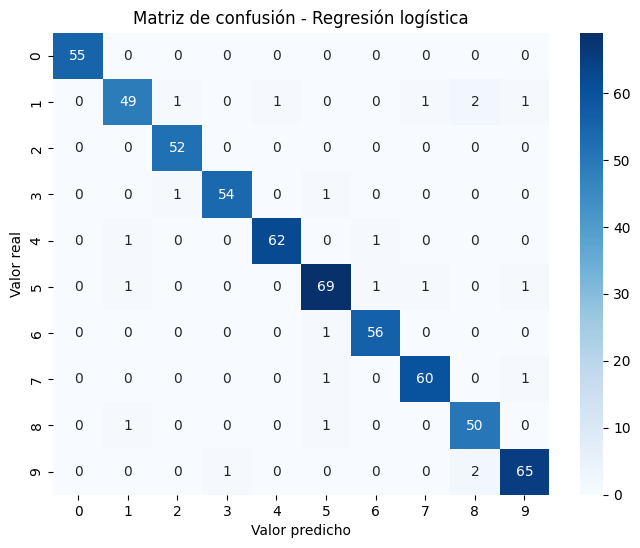

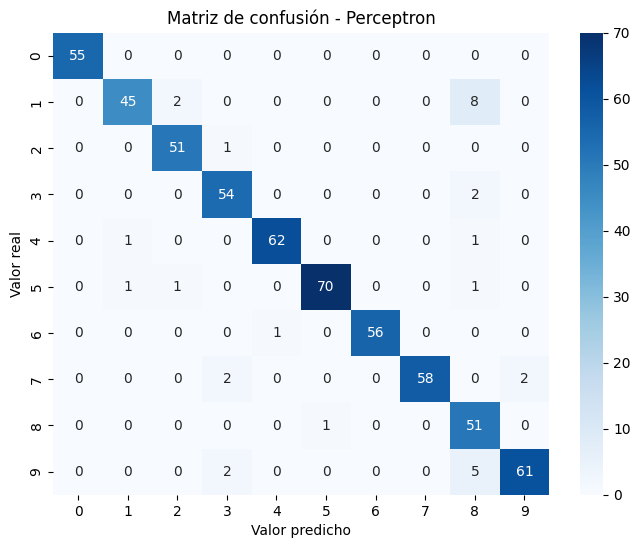

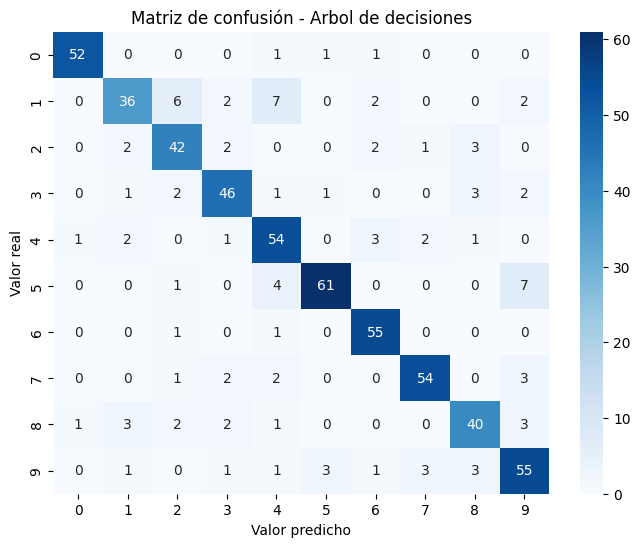

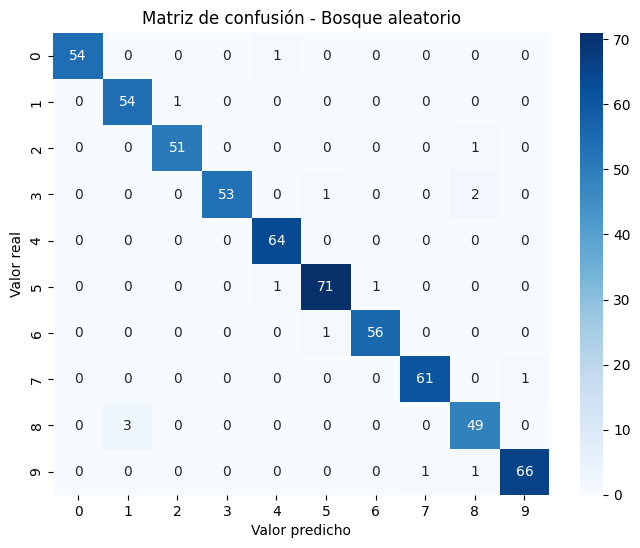

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Function for showing the confusion matrix of a model
def showConfusionMatrix(model, modelName, X, y):
    conf_matrix = confusion_matrix(y, model.predict(X))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Valor predicho")
    plt.ylabel("Valor real")
    plt.title(f"Matriz de confusión - {modelName}")
    plt.show()


for model, name in zip(modelsSklearn, modelsNames):
    showConfusionMatrix(model, name, X_test, y_test)

Como podemos observar, el rendimiento ligeramente inferior del perceptron respecto de la regresión lineal se debe principalmente a confundir el 1 y el 9 con 8.

Igualmente el rendimiento ligeramente inferior del árbol de decisión respecto del bosque aleatorio se debe principalmente a confundir el 1 con el 2 y el 4, el 5 con el 4 y 9, y otros valores en menor medida.

### Nivel B

En este nivel compararemos el rendimiento de los modelos anteriores con el dataset completo del repositorio [UCI Machine learning](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Primero probaremos si cambian los resultados anteriores cuando se le aplican nuevos datos no usados ni en el entreno ni el test. Después, intentaremos mejorar los resultados re-entrenando los modelos con nuevos conjuntos de aprendizaje, test y validación, usando el método [k-fold crossvalidation](https://scikit-learn.org/stable/modules/cross_validation.html) para elegir el mejor modelo.

#### Predicción con nuevo dataset

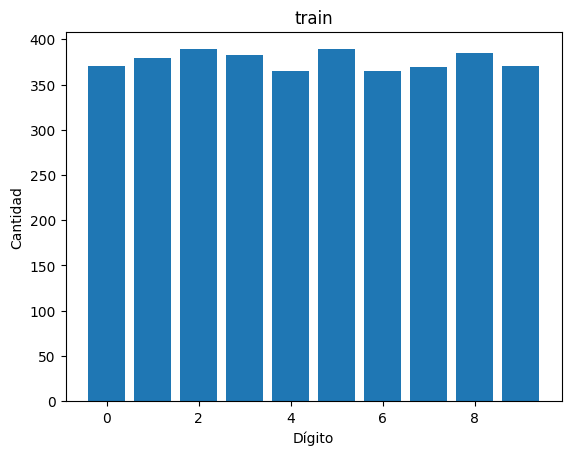

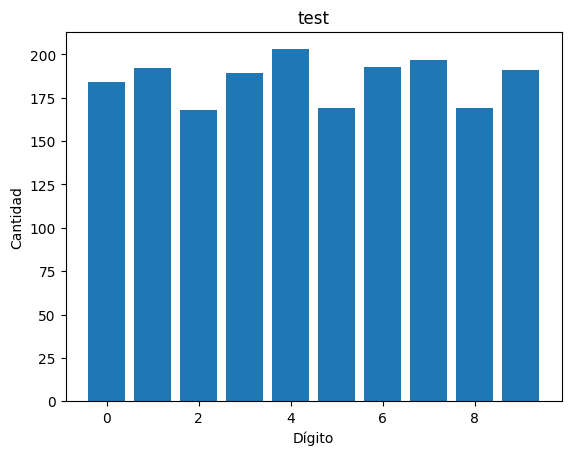

In [7]:
from ucimlrepo import fetch_ucirepo

optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

y_train = y_train.values.ravel()

digitDistribution(y_train, "entreno")
digitDistribution(y_test, "test")

Como podemos ver estos nuevos datasets están distribuidos correctamente.


Vamos a comparar el rendimiento de los modelos anteriores con unos nuevos entrenados con los nuevos datos.

In [8]:

metricsModelsSklearnTestUCI = calcMetrics(modelsSklearn, X_test, y_test)
trainModels(modelsSklearn, X_train, y_train)
metricsModelsUCI =  calcMetrics(modelsSklearn, X_test, y_test)

print("\nDataset entreno: sklearn\t Dataset test: sklearn")
showMetrics(metricsModelsSklearn)

print("\nDataset entreno: sklearn\t Dataset test: UCI")
showMetrics(metricsModelsSklearnTestUCI)

print("\nDataset entreno: UCI\t Dataset test: UCI")
showMetrics(metricsModelsUCI)

c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Dataset entreno: sklearn	 Dataset test: sklearn
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.962963   0.963046  0.962963  0.962857
1           Perceptron  0.947811   0.954246  0.947811  0.948781
2  Arbol de decisiones  0.833333   0.835809  0.833333  0.832847
3     Bosque aleatorio  0.974747   0.975129  0.974747  0.974794

Dataset entreno: sklearn	 Dataset test: UCI
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.952561   0.952636  0.952561  0.952519
1           Perceptron  0.926685   0.935591  0.926685  0.927903
2  Arbol de decisiones  0.841509   0.842424  0.841509  0.841011
3     Bosque aleatorio  0.961186   0.961605  0.961186  0.961124

Dataset entreno: UCI	 Dataset test: UCI
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.961725   0.962278  0.961725  0.961886
1           Perceptron  0.944474   0.946817  0.944474  0.944450
2  Arbol de decisiones  0.894879 

Como podemos observar la calidad de las predicciones disminuye ligeramente cuando lo probamos con el nuevo dataset.

Sin embargo, al entrenar los modelos con el respectivo dataset de entreno y volvemos a probarlo vemos un rendimiento similar respecto al dataset de sklearn, a excepción del modelo de árbol de decisiones donde vemos una mejora de 6 puntos porcentuales, siendo ésta una mejora significativa. Analizemos por qué.

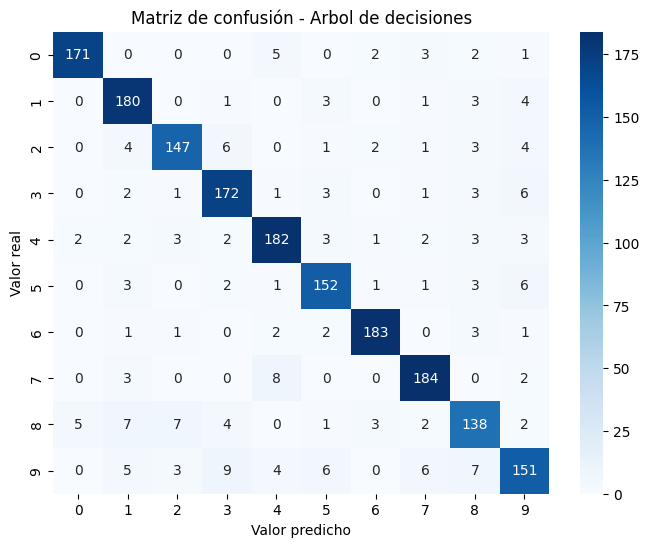

In [9]:
showConfusionMatrix(modelsSklearn[2], modelsNames[2], X_test, y_test)

Como podemos observar, contamos con muchas más muestras para cada dígito, esto hace que aumente la cantidad de errores absolutos pero, proporcionalmente, acierta más que con el dataset anterior, se confunde menos, esto lo podemos verificar rápidamente viendo que fuera de la diagonal principal el resto de casillas son todas prácticamente blancas.

#### Cross validation

Procedemos a entrenar los modelos con este nuevo dataset analizando que combinación de parámetros nos da los mejores resultados.

In [10]:
# imports
from sklearn.model_selection import GridSearchCV

logisticRegressionCV = GridSearchCV(
    LogisticRegression(random_state=42, n_jobs=-1),  # parallel computing
    param_grid={
        "penalty": ["l1", None],
        "fit_intercept": [False, True],
        "solver": [
            "sag",
            "saga",
        ],  # large datasets multiclass
        "tol": [1e-2, 1e-4],
        "max_iter": [100, 75, 110],
    },
    cv=5,
    scoring="accuracy",
)
perceptronCV = GridSearchCV(
    Perceptron(random_state=42, n_jobs=-1),  # parallel computing
    param_grid={
        "penalty": ["l1", "l2", "elasticnet", None],
        "alpha": [1e-4, 1e-5],
        "max_iter": [100, 90, 110],
    },
    cv=5,
    scoring="accuracy",
)
decisionTreeCV = GridSearchCV(
    DecisionTreeClassifier(
        random_state=42,
    ),
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "min_samples_split": [2, 5],
        "class_weight": ["balanced", None],
    },
    cv=5,
    scoring="accuracy",
)
randomForestCV = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
    ),
    param_grid={
        "n_estimators": [100, 141],
        "criterion": ["gini", "entropy", "log_loss"],
        "bootstrap": [True, False],
    },
    cv=5,
    scoring="accuracy",
)

modelsCV = [logisticRegressionCV, perceptronCV, decisionTreeCV, randomForestCV]
trainModels(modelsCV, X_train, y_train)

c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Sergio\miniconda3\envs\ia2023\L

In [11]:
print("\nSklearn dataset")
showMetrics(metricsModelsSklearn)
print("\nUCI dataset")
showMetrics(metricsModelsUCI)
print("\nUCI dataset con CrossValidation")
showMetrics(calcMetrics([model.best_estimator_ for model in modelsCV], X_test, y_test))


Sklearn dataset
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.962963   0.963046  0.962963  0.962857
1           Perceptron  0.947811   0.954246  0.947811  0.948781
2  Arbol de decisiones  0.833333   0.835809  0.833333  0.832847
3     Bosque aleatorio  0.974747   0.975129  0.974747  0.974794

UCI dataset
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.961725   0.962278  0.961725  0.961886
1           Perceptron  0.944474   0.946817  0.944474  0.944450
2  Arbol de decisiones  0.894879   0.894937  0.894879  0.894595
3     Bosque aleatorio  0.977358   0.977427  0.977358  0.977309

UCI dataset con CrossValidation
                 Model  Accuracy  Precision    Recall  f1-score
0  Regresión logística  0.967116   0.967454  0.967116  0.967205
1           Perceptron  0.949865   0.950229  0.949865  0.949347
2  Arbol de decisiones  0.909434   0.909444  0.909434  0.909363
3     Bosque aleatorio  0.977898   0.9781

Como podemos observar, estos modelos refinados con cross validation presentan mejores predicciones que los anteriores, resultando en unos muy buenos modelos con más de un 90% de precisión todos ellos. 

### Nivel A

Este nivel consiste en desarrollar tres características de visión por ordenador y usarlas en el entrenamiento. Analizar cómo afectan a los resultados de los modelos.

En esta ocasión no vamos a desarrollar el nivel, pero vamos a plantear seis características de visión por ordenador que podrían ayudar a mejorar el reconocimiento de dígitos en caso de desarrollarlo.

- Detección de círculos.
  - Detectar círculos o áreas cerradas en los píxeles que componen los dígitos nos ayudaría a detectar el 0, 6, 8 y 9.
  - Si somos capaces de contar cuántos círculos componen el dígito podríamos distinguir el 8 (2) del 0, 6 y 9 (1).
  - Si podemos discernir la posición del círculo podríamos distinguir entre el 6 (abajo) y el 9 (arriba).
- Detección de semicírculos.
  - Detectar semicirculos nos facilitaría la distinción del 3 y el 5 respecto del resto, incluso podría ayudar con el 2.
  - Si somos capaces de contar cuántos semicírculos componen el dígito podríamos distinguir el 3 (2) del 2 y 5 (1).
  - Si podemos discernir la posición del semicírculo podríamos distinguir entre el 2 (arriba) y el 5 (abajo).